## NAME: OLAMIDE BANKOLE

## FUNDAMENTALS OF DATA SCIENCE PROJECT (SUMMATIVE)

## STUDENT ID : 202428313

## Importing all Libraries we need for this assignment

In [5]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Dataset

In [7]:
my_df = pd.read_csv("T1_A24census3.csv")
my_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Todd Lake,Zoe,Vaughan,82,Head,Married,Female,"Retired Journalist, newspaper",NaN,No Religion
1,1,Todd Lake,John,Vaughan,80,Husband,Married,Male,Retired Paramedic,NaN,No Religion
2,2,Todd Lake,Molly,Butler,66,Head,Widowed,Female,Retail banker,NaN,No Religion
3,3,Todd Lake,Eileen,Powell,79,Head,Widowed,Female,Retired Adult guidance worker,NaN,Christian
4,4,Todd Lake,Laura,Begum,50,Head,Divorced,Female,Paramedic,NaN,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
9764,1,Chelmsford Hall,Stanley,Davies,23,Son,Single,Male,Publishing copy,NaN,No Religion
9765,1,Chelmsford Hall,Lindsey,Davies,21,Daughter,Divorced,Female,University Student,NaN,Christian
9766,1,Chelmsford Hall,Maurice,Davies,19,Son,Single,Male,University Student,NaN,No Religion
9767,1,Chelmsford Hall,Carole,Davies,18,Daughter,Single,Female,Student,NaN,Christian


In [8]:
my_df.info() # checking the dataset's information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9769 non-null   int64 
 1   Street                         9769 non-null   object
 2   First Name                     9769 non-null   object
 3   Surname                        9756 non-null   object
 4   Age                            9769 non-null   int64 
 5   Relationship to Head of House  9173 non-null   object
 6   Marital Status                 7417 non-null   object
 7   Gender                         9769 non-null   object
 8   Occupation                     9769 non-null   object
 9   Infirmity                      122 non-null    object
 10  Religion                       8528 non-null   object
dtypes: int64(2), object(9)
memory usage: 839.7+ KB


In [9]:
my_df.isnull().sum() #checking for missing values

House Number                        0
Street                              0
First Name                          0
Surname                            13
Age                                 0
Relationship to Head of House     596
Marital Status                   2352
Gender                              0
Occupation                          0
Infirmity                        9647
Religion                         1241
dtype: int64

In [10]:
#make a copy of the original csv file to avoid altering or corrupting the original dataset
my_df.to_csv("T1_A24census3_copy.csv", index = False)
my_df2= pd.read_csv("T1_A24census3_copy.csv")
my_df2

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Todd Lake,Zoe,Vaughan,82,Head,Married,Female,"Retired Journalist, newspaper",NaN,No Religion
1,1,Todd Lake,John,Vaughan,80,Husband,Married,Male,Retired Paramedic,NaN,No Religion
2,2,Todd Lake,Molly,Butler,66,Head,Widowed,Female,Retail banker,NaN,No Religion
3,3,Todd Lake,Eileen,Powell,79,Head,Widowed,Female,Retired Adult guidance worker,NaN,Christian
4,4,Todd Lake,Laura,Begum,50,Head,Divorced,Female,Paramedic,NaN,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
9764,1,Chelmsford Hall,Stanley,Davies,23,Son,Single,Male,Publishing copy,NaN,No Religion
9765,1,Chelmsford Hall,Lindsey,Davies,21,Daughter,Divorced,Female,University Student,NaN,Christian
9766,1,Chelmsford Hall,Maurice,Davies,19,Son,Single,Male,University Student,NaN,No Religion
9767,1,Chelmsford Hall,Carole,Davies,18,Daughter,Single,Female,Student,NaN,Christian


## Data Cleaning

In [12]:
#Lets start by replacing all empty strings in our dataset with NaN
my_df2.replace(" ", np.nan, inplace=True)

In [13]:
print(my_df2['Gender'].unique())

['Female' 'Male']


## Cleaning the Surname Column, filling the missing values 

In [15]:
my_df2[my_df2["Surname"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
875,18,Brooks Path,Justin,NaN,76,Husband,Married,Male,Retired Product manager,NaN,No Religion
1584,104,Salmon Street,Nicole,NaN,72,Wife,Married,Female,Retired Control and instrumentation engineer,NaN,Christian
1958,22,Ouse Parkways,Dennis,NaN,56,Husband,Married,Male,Art gallery manager,NaN,No Religion
2806,13,Scott Lane,Paul,NaN,52,Husband,Married,Male,"Conservator, furniture",NaN,Christian
2983,10,Pound Close,Nicholas,NaN,75,Husband,Married,Male,"Retired Geneticist, molecular",NaN,Christian
4425,11,Dale Meadows,Ian,NaN,63,Husband,Married,Male,Broadcast presenter,NaN,Christian
4440,18,Dale Meadows,Hazel,NaN,71,Wife,Married,Female,Retired Research scientist (life sciences),NaN,Christian
4503,20,Pillar Close,Shaun,NaN,34,Husband,Married,Male,Lobbyist,NaN,No Religion
5917,24,Lightning Inlet,Joyce,NaN,57,Wife,Married,Female,Petroleum engineer,NaN,No Religion
6680,101,Belletun Road,Leonard,NaN,67,Husband,Married,Male,"Psychologist, sport and exercise",NaN,No Religion


In [16]:
# Function to get the surname of the head of the household, with a fallback if no head exists
def get_head_surname(group):
    head_surnames = group.loc[group['Relationship to Head of House'] == 'Head', 'Surname']
    if not head_surnames.empty:
        return head_surnames.values[0]
    else:
        return 'Unknown'  # Default value if no head exists

# Create a dictionary to map (House Number, Street) -> Head's surname
group_surnames = my_df2.groupby(['House Number', 'Street']).apply(get_head_surname).to_dict()

# Function to fill missing surnames based on the head of the household
def fill_surname(row, group_surnames):
    if pd.isna(row['Surname']):
        return group_surnames.get((row['House Number'], row['Street']), 'Unknown')
    else:
        return row['Surname']

# Apply the surname filling function across the DataFrame
my_df2['Surname'] = my_df2.apply(lambda row: fill_surname(row, group_surnames), axis=1)

#checking to see if the changes in the Surname column have been effected
print(my_df2['Surname'].isnull().sum())


0


/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/950755871.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_surnames = my_df2.groupby(['House Number', 'Street']).apply(get_head_surname).to_dict()


## Cleaning the relationship to head of house column

In [18]:
my_df2[my_df2["Relationship to Head of House"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
36,21,Todd Lake,Valerie,Lawson,56,NaN,Single,Female,Barrister's clerk,NaN,Christian
37,21,Todd Lake,Eileen,Williams,20,NaN,Single,Female,University Student,NaN,Christian
48,30,Todd Lake,Stewart,Turner,22,NaN,Single,Male,University Student,NaN,No Religion
81,9,Ring Walks,Bryan,Stanley,52,NaN,Single,Male,"Scientist, physiological",NaN,Christian
155,12,Newcastle Stravenue,Sam,Barlow,20,NaN,Single,Male,University Student,NaN,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
9618,1,Howell Palace,Lawrence,Atkinson,23,NaN,Single,Male,Data scientist,NaN,Christian
9652,1,Corporation Hall,Marion,Webb,28,NaN,Single,Female,PhD Student,NaN,Muslim
9653,1,Corporation Hall,James,Kelly,19,NaN,Single,Male,University Student,NaN,No Religion
9654,1,Corporation Hall,Sheila,Ali,20,NaN,Single,Female,University Student,NaN,Christian


In [19]:
print(my_df2['Relationship to Head of House'].unique())

['Head' 'Husband' 'Daughter' 'Son' 'Wife' 'Partner' nan 'Granddaughter'
 'Step-Daughter' 'Grandson' 'Lodger' 'Sibling' 'Visitor' 'Cousin'
 'Step-Son' 'Adopted Granddaughter' 'Niece' 'Nephew' 'Adopted Son'
 'Adopted Daughter' 'Adopted Grandson']


In [20]:
#defining values for females and males

males = ['Son','Step-Son', 'Nephew','Grandson',  ]
females= ['Daughter','Step-Daughter','Niece', 'Granddaughter' ]

#defining a function to randomly select a value from the list to replace Nan values
def random_sampling(rand_values):
    return np.random.choice(rand_values)

#applying random selection for males who are single
single_male = ((my_df2['Gender'].str.lower().isin(['male'])) &
               (my_df2['Marital Status'] == 'Single') &
               (my_df2['Relationship to Head of House'].isna()))
my_df2.loc[single_male, 'Relationship to Head of House'] = my_df2.loc[single_male].apply(lambda x: random_sampling(males), axis=1)


#applying random selection for females who are single
single_female = ((my_df2['Gender'].str.lower().isin(['female'])) &
                 (my_df2['Marital Status'] == 'Single') &
                 (my_df2['Relationship to Head of House'].isna()))
my_df2.loc[single_female, 'Relationship to Head of House'] = my_df2.loc[single_female].apply(lambda x: random_sampling(females), axis=1)



In [21]:
#Now let's check how many NaN values left in the relationship to head of house column
my_df2[my_df2['Relationship to Head of House'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
157,12,Newcastle Stravenue,Rachel,Davies,24,NaN,Divorced,Female,Unemployed,NaN,Christian
521,15,Statue Walks,Marilyn,Davidson,25,NaN,Divorced,Female,Rural practice surveyor,NaN,No Religion
871,16,Brooks Path,Gavin,Hall,31,NaN,Divorced,Male,Software engineer,Blind,No Religion
1076,26,Salmon Street,Bradley,Yates,52,NaN,Divorced,Male,Adult nurse,NaN,No Religion
1732,127,Salmon Street,Sheila,Baker,35,NaN,Divorced,Female,Public relations account executive,NaN,No Religion
1733,127,Salmon Street,Ashley,Smith,45,NaN,Divorced,Male,Unemployed,NaN,Christian
1734,127,Salmon Street,Carl,Wong,46,NaN,Divorced,Male,"Scientist, water quality",NaN,Christian
1878,153,Salmon Street,Kenneth,Miah,41,NaN,Divorced,Male,Media planner,NaN,Christian
2338,18,Jackson Glens,Gerard,Roberts,48,NaN,Divorced,Male,Science writer,NaN,No Religion
4056,6,Davies Heights,Steven,Page,36,NaN,Divorced,Male,Fashion designer,NaN,Christian


In [22]:
# Define a function to extract the head's surname for each household group
def get_head_surname(group):
    head = group.loc[group['Relationship to Head of House'] == 'Head']
    if not head.empty:  # Check if a head exists in the group
        return head['Surname'].iloc[0]
    else:
        return None  # Return None if no head is found

# Create a mapping of (House Number, Street) -> Head's Surname
head_surnames = (
    my_df2.groupby(['House Number', 'Street'])
    .apply(get_head_surname)
    .to_dict()
)

# Update missing 'Relationship to Head of House' values based on conditions and head's surname
def assign_relationship(row, head_surnames):
    if pd.isna(row['Relationship to Head of House']):
        head_surname = head_surnames.get((row['House Number'], row['Street']))
        if head_surname and row['Surname'] == head_surname:
            if row['Gender'] == 'Female' and row['Marital Status'] == 'Married':
                return 'Wife'
            elif row['Gender'] == 'Male' and row['Marital Status'] == 'Married':
                return 'Husband'
        return 'Unknown'
    return row['Relationship to Head of House']

# Apply the assignment function to fill in the 'Relationship to Head of House' column
my_df2['Relationship to Head of House'] = my_df2.apply(
    lambda row: assign_relationship(row, head_surnames), axis=1
)

#checking if there are any more remaining NaN values in the 'Relationship to Head of House' column after carrying out our operation
my_df2['Relationship to Head of House'].isnull().sum()

/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/1366673105.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(get_head_surname)


0

#### We now have 0 missing values in the relationship to head of house column

## Let's Check for any suspicious entries in the relationship to head of house column

##### https://propertysaviour.co.uk/can-children-own-a-property/#:~:text=Buying%20Property%20at%20a%20Young,fees%20associated%20with%20the%20property.

#### In UK a minor can not own a home/property so lets check for any entry below 18 that has been assigned head and replace with something suitable

In [27]:
#checking for any underage (below 18) individual marked as head of house 
under_18_head_of_house = my_df2[(my_df2['Age'] < 18) & (my_df2['Relationship to Head of House'] == 'Head')]

under_18_head_of_house

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
868,15,Brooks Path,Michelle,Page,0,Head,Single,Female,Child,NaN,NaN
4369,25,Palmer Ridges,Wayne,Edwards,4,Head,Single,Male,Child,NaN,NaN
4681,27,Exchange Lane,Neil,Wade,7,Head,Divorced,Male,Student,NaN,NaN
4752,1,Riley Shore,Alex,Blackburn,17,Head,Divorced,Male,Unemployed,NaN,NaN
7145,51,Clark Ramp,Jessica,Hart,7,Head,Married,Female,Student,NaN,NaN
8213,6,Church Crescent,Pauline,Mills,16,Head,Single,Female,Student,NaN,NaN
9134,29,Mercia Mall,David,Johnston,0,Head,Single,Male,Child,NaN,NaN
9438,58,Payne Ford,William,Higgins,0,Head,Single,Male,Child,NaN,NaN


In [28]:
##checking for any family relation
possible_family = my_df2[(my_df2['Surname'] == 'Blackburn') & (my_df2['Street'] == 'Riley Shore')]

possible_family

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4752,1,Riley Shore,Alex,Blackburn,17,Head,Divorced,Male,Unemployed,NaN,NaN
4753,1,Riley Shore,Toby,Blackburn,1,Son,NaN,Male,Child,NaN,NaN


#### Here Alex is underage and the next entry with the same surname as him is Son ,1 year old which is also suspicious. Here we will replace the Head with Unknown since there is no head in the household

In [30]:
##replacing that entry with 'Unkown' using the index
my_df2.at[4752, 'Relationship to Head of House'] = 'Unknown'

In [31]:
# Lets check if this has been replaced
single_row = my_df2.iloc[4752]
print(single_row)

House Number                               1
Street                           Riley Shore
First Name                              Alex
Surname                            Blackburn
Age                                       17
Relationship to Head of House        Unknown
Marital Status                      Divorced
Gender                                  Male
Occupation                        Unemployed
Infirmity                                NaN
Religion                                 NaN
Name: 4752, dtype: object


In [32]:
possible_family = my_df2[(my_df2['Surname'] == 'Hart') & (my_df2['Street'] == 'Clark Ramp')]

possible_family

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7145,51,Clark Ramp,Jessica,Hart,7,Head,Married,Female,Student,NaN,NaN
7146,51,Clark Ramp,Danny,Hart,19,Husband,Married,Male,University Student,NaN,NaN


#### There seem to be a family relation here and Jessica is 7 years old and can not be the head the Daughter not Head, Danny is probably her Brother conisdering the age, so we will replace the Head entry for Jessica with Unknown since there is no head in the household

In [34]:
my_df2.at[7145, 'Relationship to Head of House'] = 'Unknown'

In [35]:
# Lets check if this has been replaced
single_row = my_df2.iloc[7145]
print(single_row)

House Number                             51
Street                           Clark Ramp
First Name                          Jessica
Surname                                Hart
Age                                       7
Relationship to Head of House       Unknown
Marital Status                      Married
Gender                               Female
Occupation                          Student
Infirmity                               NaN
Religion                                NaN
Name: 7145, dtype: object


In [36]:
possible_family = my_df2[(my_df2['Surname'] == 'Wade') & (my_df2['Street'] == 'Exchange Lane')]

possible_family

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4681,27,Exchange Lane,Neil,Wade,7,Head,Divorced,Male,Student,NaN,NaN


In [37]:
possible_family = my_df2[(my_df2['Surname'] == 'Edwards') & (my_df2['Street'] == 'Palmer Ridges')]

possible_family

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4369,25,Palmer Ridges,Wayne,Edwards,4,Head,Single,Male,Child,NaN,NaN


In [38]:
possible_family = my_df2[(my_df2['Surname'] == 'Mills') & (my_df2['Street'] == 'Church Crescent')]

possible_family

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8213,6,Church Crescent,Pauline,Mills,16,Head,Single,Female,Student,NaN,NaN
8412,59,Church Crescent,Katy,Mills,57,Head,Married,Female,"Pilot, airline",NaN,No Religion
8413,59,Church Crescent,Albert,Mills,59,Husband,Married,Male,Accommodation manager,NaN,No Religion
8414,59,Church Crescent,Luke,Mills,32,Son,Single,Male,Production engineer,NaN,No Religion


#### This seem to be a family unit and Pauline is the Daughter not Head, the Head has already been assigned to Katy who appears to be the mother, so we will replace the Head entry for Pauline with Daughter

In [40]:
my_df2.at[8213, 'Relationship to Head of House'] = 'Daughter'

In [41]:
# Lets check if this has been replaced
single_row = my_df2.iloc[8213]
print(single_row)

House Number                                   6
Street                           Church Crescent
First Name                               Pauline
Surname                                    Mills
Age                                           16
Relationship to Head of House           Daughter
Marital Status                            Single
Gender                                    Female
Occupation                               Student
Infirmity                                    NaN
Religion                                     NaN
Name: 8213, dtype: object


In [42]:
#filtering through the dataset to find individuals with the surname 'Banks' and street 'Nicholson Tunnel'
possible_family = my_df2[(my_df2['Surname'] == 'Page') & (my_df2['Street'] == 'Brooks Path')]

possible_family

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
868,15,Brooks Path,Michelle,Page,0,Head,Single,Female,Child,NaN,NaN


In [43]:
possible_family = my_df2[(my_df2['Surname'] == 'Higgins') & (my_df2['Street'] == 'Payne Ford')]

possible_family

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9438,58,Payne Ford,William,Higgins,0,Head,Single,Male,Child,NaN,NaN
9465,75,Payne Ford,Vincent,Higgins,79,Head,Single,Male,Unemployed,NaN,Christian


#### This seem to be a family unit as well and William is the son not Head, the Head has already been assigned to Vincent who appears to be the father, so we will replace the Head entry for William with Son

In [45]:
my_df2.at[9438, 'Relationship to Head of House'] = 'Son'

In [46]:
# Lets check if this has been replaced
single_row = my_df2.iloc[9438]
print(single_row)

House Number                             58
Street                           Payne Ford
First Name                          William
Surname                             Higgins
Age                                       0
Relationship to Head of House           Son
Marital Status                       Single
Gender                                 Male
Occupation                            Child
Infirmity                               NaN
Religion                                NaN
Name: 9438, dtype: object


In [47]:
possible_family = my_df2[(my_df2['Surname'] == 'Johnston') & (my_df2['Street'] == 'Mercia Mall')]

possible_family

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9134,29,Mercia Mall,David,Johnston,0,Head,Single,Male,Child,NaN,NaN


In [48]:
under_18_head_of_house = my_df2[(my_df2['Age'] < 18) & (my_df2['Relationship to Head of House'] == 'Head')]

under_18_head_of_house

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
868,15,Brooks Path,Michelle,Page,0,Head,Single,Female,Child,NaN,NaN
4369,25,Palmer Ridges,Wayne,Edwards,4,Head,Single,Male,Child,NaN,NaN
4681,27,Exchange Lane,Neil,Wade,7,Head,Divorced,Male,Student,NaN,NaN
9134,29,Mercia Mall,David,Johnston,0,Head,Single,Male,Child,NaN,NaN


#### After the cleaning we can now see that the entries have reduced since these ones left do not have any family ties to trace to we will assign  Unknown

In [50]:
# Identify individuals under 18 with 'Head' as their relationship
under_18_head_of_house = (my_df2['Age'] < 18) & (my_df2['Relationship to Head of House'] == 'Head')

# Replace 'Head' with 'Unknown' for these individuals
my_df2.loc[under_18_head_of_house, 'Relationship to Head of House'] = 'Unknown'

In [51]:
under_18_head_of_house = my_df2[(my_df2['Age'] < 18) & (my_df2['Relationship to Head of House'] == 'Head')]

under_18_head_of_house

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### Suspicious entries here has been replaced with something more appropriate

#### NOTE: There are also suspicious entries for Marital Status in some of the above, this will be corrected much later when cleaning the Marital Status column

## Checking for any inconsistencies in the Gender Column

In [54]:
# Filter for inconsistent rows in the relationship to head of house column and gender column
# for example if we have relationship to head of house as son and gender as female then we have an inconsistency
inconsistent_rows = my_df2[
    ((my_df2['Relationship to Head of House'].str.lower() == 'son') & (my_df2['Gender'].str.lower() == 'female')) |
    ((my_df2['Relationship to Head of House'].str.lower() == 'daughter') & (my_df2['Gender'].str.lower() == 'male'))
]

# Display the inconsistent rows
inconsistent_rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [55]:
#filling the NaN values in the occupation column who are less than 13 years of age with 'Child'

my_df2.loc[(my_df2['Occupation'].isnull()) & (my_df2['Age'] < 13),:] = my_df2.loc[(my_df2['Occupation'].isnull()) & (my_df2['Age'] < 13),:].fillna(value = {"Occupation": "Child"})

#printing out the remaining NaN values in the occupation column after carrying out this operation
my_df2[my_df2['Occupation'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Checking for any suspicious entry for Occupation

In [57]:
under_18_working = my_df2[(my_df2['Age'] < 13) & (my_df2['Occupation'] != 'Child') & (my_df2['Occupation'] != 'Student')]

print(f"Number of rows with age under 18 and occupation is not child or student': {len(under_18_working)}")

Number of rows with age under 18 and occupation is not child or student': 0


## Checking for any inconsistencies in the Age Column

In [59]:
under_18_married = my_df2[(my_df2['Age'] < 18) & (my_df2['Marital Status'] == 'Married')]

print(f"Number of rows with age under 18 and marital status 'Married': {len(under_18_married)}")

Number of rows with age under 18 and marital status 'Married': 29


In [60]:
# Filter for under 18 and marital status 'Married' and replace with 'N/A (Minor)'
my_df2.loc[(my_df2['Age'] < 18) & (my_df2['Marital Status'] == 'Married'), 'Marital Status'] = 'N/A (Minor)'

In [61]:
under_18_married = my_df2[(my_df2['Age'] < 18) & (my_df2['Marital Status'] == 'Married')]

print(f"Number of rows with age under 18 and marital status 'Married': {len(under_18_married)}")

Number of rows with age under 18 and marital status 'Married': 0


#### We have successfully replaced all entries below age 18 with the marital status 'Married' with N/A(Minors) since they are not legal to get married yet in the UK (https://www.gov.uk/government/news/legal-age-of-marriage-in-england-and-wales-rises-to-18)

In [63]:
# Filter for unrealistic ages (greater than 115)
outliers_age = my_df2[my_df2['Age'] > 118]

# Display the outliers
if not outliers_age.empty:
    print("Outliers based on age > 115:")
    print(outliers_age[['Age', 'Occupation']])
else:
    print("No individuals with age > 115 found.")

No individuals with age > 115 found.


#### The oldest person in the Uk is 115, we do not have any above 115 in the dataset (https://oldestinbritain.nfshost.com/)

## Cleaning the Marital Status Column

In [66]:
my_df2[my_df2["Marital Status"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5,4,Todd Lake,Cheryl,Jones-Begum,11,Daughter,NaN,Female,Student,NaN,NaN
6,4,Todd Lake,Aaron,Jones-Begum,9,Son,NaN,Male,Student,NaN,NaN
7,4,Todd Lake,Phillip,Jones-Begum,7,Son,NaN,Male,Student,NaN,NaN
13,8,Todd Lake,Deborah,Smith,12,Daughter,NaN,Female,Student,NaN,NaN
16,9,Todd Lake,Anne,Wood,9,Daughter,NaN,Female,Student,NaN,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
9743,1,Bailey Keep,Daniel,Power,4,Son,NaN,Male,Child,NaN,No Religion
9744,1,Bailey Keep,Billy,Power,4,Son,NaN,Male,Child,NaN,No Religion
9745,1,Bailey Keep,Marion,Power,0,Daughter,NaN,Female,Child,NaN,No Religion
9760,1,Duchess Hall,Carl,White,13,Son,NaN,Male,Student,NaN,No Religion


In [67]:
print(my_df2['Marital Status'].unique())

['Married' 'Widowed' 'Divorced' nan 'Single' 'N/A (Minor)']


In [68]:
##Checking the number of minors(<18) with missing values in the marital status column
my_df2.loc[my_df2['Age'] < 18, 'Marital Status'].isna().sum()

2352

#### From the count above we can see that all the 2352 missing values in the Marital Status column are actually minors,so we can easily clean this 

In [70]:
# Fill missing Marital Status for children under 18 with "N/A(Minor)"
my_df2['Marital Status'] = my_df2.apply(lambda row: 'N/A(Minor)' if pd.isna(row['Marital Status']) and 
                        row['Age'] < 18 else row['Marital Status'],axis=1)

#checking if there are any more remaining NaN values in the 'Marital Status' column after carrying out our operation
my_df2['Marital Status'].isnull().sum()

0

#### We have successfully filled all missing values below age 18 with the marital status 'Married' with N/A(Minors) since they are not legal to get married yet in the UK (https://www.gov.uk/government/news/legal-age-of-marriage-in-england-and-wales-rises-to-18)

## - Let's check for individuals whose marital status is widowed and younger than 18

In [73]:
# Filter for individuals who are marked as widowed and younger than 18
widowed_under_18 = my_df2[(my_df2['Marital Status'] == 'Widowed') & (my_df2['Age'] < 18)]

# Check if any such entries exist
if not widowed_under_18.empty:
    print("There are underaged individuals(below 18) marked as widowed")
else:
    print("No underaged individuals(below 18) marked as widowed.")

There are underaged individuals(below 18) marked as widowed


In [74]:
#Lets see how many entries we have 
widowed_under_18 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3521,44,Ford Close,Leonard,Booth-Willis,14,Son,Widowed,Male,Student,NaN,NaN


#### Again this is probably an error or false entry, a 14 year old is not legal to get married not to talk of been widowed at 14, so we will replace this with N/A(Minor) too 

In [76]:
# Replace widowed in marital status under 18 entries with "N/A (Minors)"
widowed_under_18_fixed = my_df2.loc[widowed_under_18.index, 'Marital Status'] = 'N/A (Minor)'

In [77]:
# Filter for individuals who are marked as widowed and younger than 18
widowed_under_18 = my_df2[(my_df2['Marital Status'] == 'Widowed') & (my_df2['Age'] < 18)]

# Check if any such entries exist
if not widowed_under_18.empty:
    print("There are underaged individuals(below 18) marked as widowed")
else:
    print("No underaged individuals(below 18) marked as widowed.")

No underaged individuals(below 18) marked as widowed.


## - Let's check for individuals whose marital status is divorced and younger than 18

In [79]:
# Filter for individuals who are marked as widowed and younger than 18
divorced_under_18 = my_df2[(my_df2['Marital Status'] == 'Divorced') & (my_df2['Age'] < 18)]

# Check if any such entries exist
if not divorced_under_18.empty:
    print("There are underaged individuals(below 18) marked as divorced")
else:
    print("No underaged individuals(below 18) marked as divorced.")

There are underaged individuals(below 18) marked as divorced


In [80]:
divorced_under_18

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1197,45,Salmon Street,Chelsea,Gibbons,5,Daughter,Divorced,Female,Student,NaN,NaN
3954,158,Ford Close,Joanne,Savage,10,Daughter,Divorced,Female,Student,NaN,NaN
4102,15,Rose Road,Victoria,Evans,5,Daughter,Divorced,Female,Student,NaN,NaN
4681,27,Exchange Lane,Neil,Wade,7,Unknown,Divorced,Male,Student,NaN,NaN
4752,1,Riley Shore,Alex,Blackburn,17,Unknown,Divorced,Male,Unemployed,NaN,NaN
6557,61,Belletun Road,Stephen,Howe,2,Son,Divorced,Male,Child,NaN,NaN
8037,16,School Street,Zoe,Walters,13,Daughter,Divorced,Female,Student,NaN,NaN
8804,21,Butler Haven,Grace,Hill,7,Daughter,Divorced,Female,Student,NaN,NaN


In [81]:
# Replace divorced in marital status under 18 entries with "N/A (Minors)"
divorced_under_18_fixed = my_df2.loc[divorced_under_18.index, 'Marital Status'] = 'N/A (Minor)'

In [82]:
# Filter for individuals who are marked as widowed and younger than 18
divorced_under_18 = my_df2[(my_df2['Marital Status'] == 'Divorced') & (my_df2['Age'] < 18)]

# Check if any such entries exist
if not divorced_under_18.empty:
    print("There are underaged individuals(below 18) marked as divorced")
else:
    print("No underaged individuals(below 18) marked as divorced.")

No underaged individuals(below 18) marked as divorced.


#### - All fixed now!

## Cleaning the infirmity column

In [85]:
# checking for missing values
my_df2['Infirmity'].isnull().sum()

9663

In [86]:
my_df2['Infirmity'] = my_df2['Infirmity'].fillna("Unknown")

In [87]:
my_df2.Infirmity.value_counts()

Infirmity
Unknown                9663
Broken Finger            28
Physical Disability      19
Blind                    15
Mental Disability        14
Unknown Infection        12
Deaf                     11
Disabled                  7
Name: count, dtype: int64

#### According to the 1881 census style only "deaf and dumb, blind, imbecile or idiot, or lunatic" were recognized as Infirmity, Broken finger, while can be very painful is not a long term illness(Infirmity),so we will replace this with No infirimity, Unknown infection is not an Infirmity as well, this will be replaced with No infirmity too .

In [89]:
#replacing 'broken finger' and 'unknown infection' with no infirmity
my_df2['Infirmity'] = my_df2['Infirmity'].replace(["Broken Finger", "Unknown Infection"], "No Infirmity")

# confirming if replacement was made
my_df2.Infirmity.unique()

array(['Unknown', 'Disabled', 'No Infirmity', 'Blind',
       'Mental Disability', 'Physical Disability', 'Deaf'], dtype=object)

In [90]:
my_df2['Infirmity'].isnull().sum()

0

#### Infirmity are disabilities and it will not be appropriate to assign any to those who have not been recorded to have one especially in a case like this where a large number is missing,it might have also been left blank because they are not comfortable putting it down(https://link.springer.com/chapter/10.1007/978-3-030-47994-7_22) since we can not say for sure ,that because they are missing input here equates as none ,as a data scientist the most appropriate option is to fill with Unknown

## Cleaning the religion column

In [93]:
my_df2[my_df2["Religion"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5,4,Todd Lake,Cheryl,Jones-Begum,11,Daughter,N/A(Minor),Female,Student,Unknown,NaN
6,4,Todd Lake,Aaron,Jones-Begum,9,Son,N/A(Minor),Male,Student,Unknown,NaN
7,4,Todd Lake,Phillip,Jones-Begum,7,Son,N/A(Minor),Male,Student,Unknown,NaN
13,8,Todd Lake,Deborah,Smith,12,Daughter,N/A(Minor),Female,Student,Unknown,NaN
21,12,Todd Lake,Anthony,Curtis,14,Son,N/A(Minor),Male,Student,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9669,1,Walker Cottage,Dorothy,Davidson,10,Daughter,N/A(Minor),Female,Student,Unknown,NaN
9670,1,Walker Cottage,Elliot,Davidson,7,Son,N/A(Minor),Male,Student,Unknown,NaN
9671,1,Walker Cottage,Stacey,Davidson,7,Daughter,N/A(Minor),Female,Student,Unknown,NaN
9672,1,Walker Cottage,Henry,Davidson,1,Son,N/A(Minor),Male,Child,Unknown,NaN


In [94]:
my_df2.loc[my_df2['Age'] < 18, 'Religion'].isna().sum()

1180

In [95]:
print(my_df['Religion'].unique())

['No Religion' 'Christian' nan 'Sikh' 'Hindu' 'Muslim' 'The Templars'
 'Buddist' 'Catholic' 'Athiest' ' ' 'The Chantry' 'Agnostic' 'Asia']


In [96]:
my_df2['Religion'] = my_df2['Religion'].fillna("Not Answered")

#### Just as we did for the infirmity column we can not impose a religion on any of the individuals who have left this blank(https://www.gov.uk/guidance/freedom-of-religion-or-belief-understanding-this-human-right).Those who have said no religion are left that way and the missing values were replaced with "Not Answered" in line with the 2021 Census Data (Office of National Statistics, 2022). 

## Fixing suspicious Religion entries

In [99]:
#Now lets check for all suspicious or false information
print(my_df2['Religion'].unique())

['No Religion' 'Christian' 'Not Answered' 'Sikh' 'Hindu' 'Muslim'
 'The Templars' 'Buddist' 'Catholic' 'Athiest' 'The Chantry' 'Agnostic'
 'Asia']


In [100]:
asia_count = (my_df2['Religion'] == 'Asia').sum()
print(f"Number of Asia: {asia_count}")

agnostic_count = (my_df2['Religion'] == 'Agnostic').sum()
print(f"Number of Agnostic: {agnostic_count}")

chantry_count = (my_df2['Religion'] == 'The Chantry').sum()
print(f"Number of The Chantry: {chantry_count}")

templars_count = (my_df2['Religion'] == 'The Templars').sum()
print(f"Number of The Templars: {templars_count}")

athiest_count = (my_df2['Religion'] == 'Athiest').sum()
print(f"Number of The Athiest: {athiest_count}")

Number of Asia: 1
Number of Agnostic: 3
Number of The Chantry: 2
Number of The Templars: 1
Number of The Athiest: 1


#### While these Religions ("Asia", "Athiest","Agnostic","The Chantry","The Templars") are not recognized in the UK,we would be bias to completely remove them from the data or replace with unknown, So we will group these entries as "Other Religion" this is inline with (Office of National Statistics,2022), which stated that "Every write-in answer counts, and everyone is included in the data published and if too few people answer in the same way the answers will be grouped with other small counts and included that way.

In [102]:
#replacing unrecognized entries for religion with 'Other Religion'

my_df2['Religion'] = my_df2['Religion'].replace(["Asia", "Athiest","Agnostic","The Chantry","The Templars"], "Other Religion")

In [103]:
print(my_df2['Religion'].unique()) #check if changes have been made

['No Religion' 'Christian' 'Not Answered' 'Sikh' 'Hindu' 'Muslim'
 'Other Religion' 'Buddist' 'Catholic']


In [104]:
# Count occurrences of 'Catholic' in the 'Religion' column
catholic_count = my_df2['Religion'].value_counts().get('Catholic', 0)

# Print the count
print(f"Frequency of 'Catholic' in Religion column: {catholic_count}")

# Count occurrences of 'Christians' in the 'Religion' column
christian_count = my_df2['Religion'].value_counts().get('Christian', 0)
print(f"Frequency of 'Christian' in copy: {christian_count}")

Frequency of 'Catholic' in Religion column: 1
Frequency of 'Christian' in copy: 4287


##### From the above result we can see there are 5127 christians in the population and 1 catholic, this means there will be demand for another religious building for the Christian denomination. We can also condense catholic to christian in line with the 2021 census (https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/religion/bulletins/religionenglandandwales/census2021)¶

In [106]:
#replacing the one "catholic" entry for religion with Christian
my_df2['Religion'] = my_df2['Religion'].replace(["Catholic"], "Christian")

print(my_df2['Religion'].unique()) #check if changes have been made

['No Religion' 'Christian' 'Not Answered' 'Sikh' 'Hindu' 'Muslim'
 'Other Religion' 'Buddist']


#### We now have these as the unique Religions - 'No Religion' 'Christian' 'Not Answered' 'Sikh' 'Hindu' 'Muslim' 'Buddist' which conforms more with the 2021 census

#### All suspicious entries here has been fixed

## Let's check if we have treated all missing values in our data

In [110]:
#Original dataset
my_df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                            13
Age                                 0
Relationship to Head of House     596
Marital Status                   2352
Gender                              0
Occupation                          0
Infirmity                        9647
Religion                         1241
dtype: int64

In [111]:
#Cleaned copy 
my_df2.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

## Data Anlaysis and Visualization

### Plot showing the Population Demography

In [114]:
#defining the age categories and categorizing the data
bins = [0, 5, 12, 19, 35, 50, 65, 80, 100, 123]  # Custom bins, adjust as needed
labels = ['0-5 (Toddlers)', '6-12 (Children)', '13-19 (Teenagers)', '20-35 (Young Adults)', 
          '36-50 (Middle-aged Adults)', '51-65 (Seniors)', '66-80 (Elderly)', 
          '81-100 (Very Old)', '100+ (Centenarians)']

my_df2['Age_Categories'] = pd.cut(my_df2['Age'], bins=bins, labels=labels, right=False)

#counting the number of people in each age category
age_cat_counts = my_df2['Age_Categories'].value_counts().sort_index()

#calculating the percentage of each age group
age_cat_percentages = (age_cat_counts / len(my_df2)) * 100

#printing the results
print("Number of People in Each Age Category:")
print(age_cat_counts)
print("\nPercentage of People in Each Age Category:")
print(age_cat_percentages)

Number of People in Each Age Category:
Age_Categories
0-5 (Toddlers)                 608
6-12 (Children)                955
13-19 (Teenagers)              992
20-35 (Young Adults)          2337
36-50 (Middle-aged Adults)    2231
51-65 (Seniors)               1579
66-80 (Elderly)                805
81-100 (Very Old)              250
100+ (Centenarians)             12
Name: count, dtype: int64

Percentage of People in Each Age Category:
Age_Categories
0-5 (Toddlers)                 6.223769
6-12 (Children)                9.775821
13-19 (Teenagers)             10.154571
20-35 (Young Adults)          23.922612
36-50 (Middle-aged Adults)    22.837547
51-65 (Seniors)               16.163374
66-80 (Elderly)                8.240352
81-100 (Very Old)              2.559116
100+ (Centenarians)            0.122838
Name: count, dtype: float64


/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/4167362758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=age_cat_counts.index, y=age_cat_counts.values, palette='plasma')


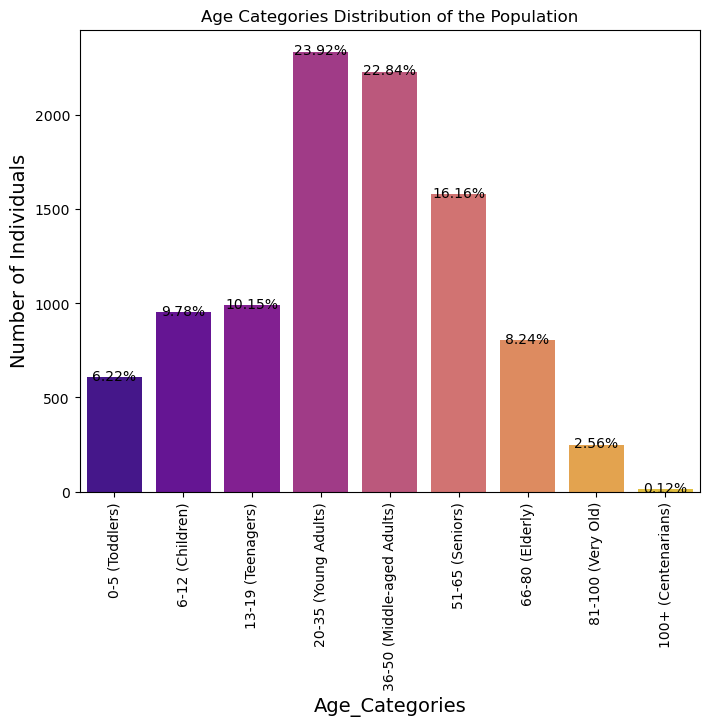

In [115]:
#plotting the Bar Chart
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=age_cat_counts.index, y=age_cat_counts.values, palette='plasma')

#adding percentag on the bars for better understanding
for bar, percentage in zip(bars.patches, age_cat_percentages):
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage:.2f}%', ha='center', va='center')

#customizing the plot
plt.xlabel('Age_Categories', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.title('Age Categories Distribution of the Population')
plt.xticks(rotation=90)

#saving and displaying the plot
plt.savefig('Age Groups Distribution of the Population.png', bbox_inches='tight') #adding bbox_inches=tight to make sure that all sides of the plot are included in the saved image and not cut off
plt.show()

## Plot for Age Pyramid

/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/3554727177.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_gender_counts = my_df2.pivot_table(values='Count', index='Age Group', columns='Gender', aggfunc=sum)
/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/3554727177.py:15: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  age_gender_counts = my_df2.pivot_table(values='Count', index='Age Group', columns='Gender', aggfunc=sum)


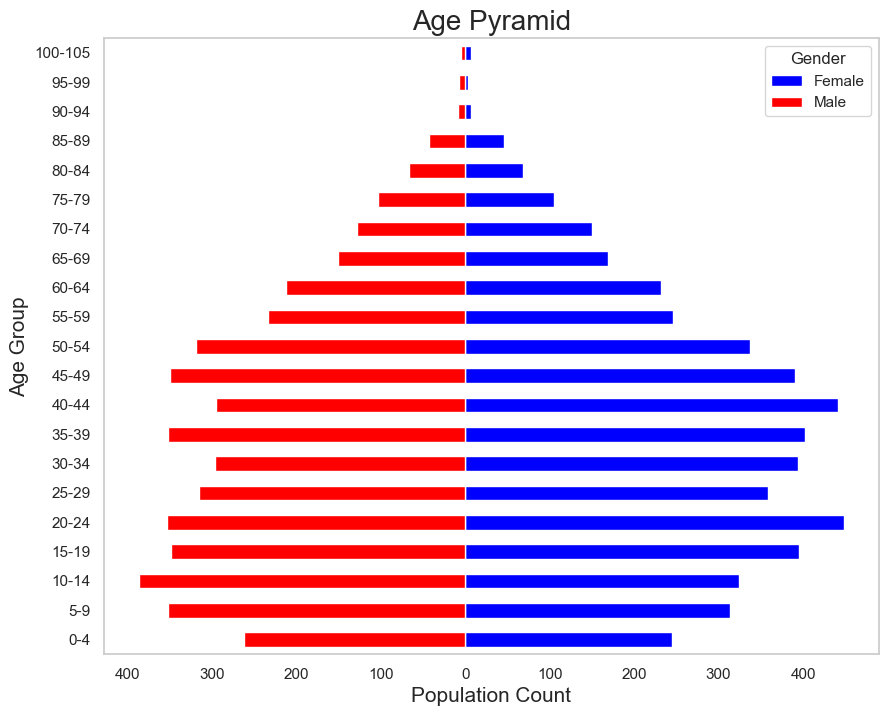

In [117]:
# Define the bins for 5-year intervals
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 105]

# Define the corresponding age group labels
groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
          '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-105']

# Add a new column to the dataframe with the age groups
my_df2['Age Group'] = pd.cut(my_df2['Age'], bins=bins, labels=groups)

# Create a new column with a count of 1 for each row
my_df2['Count'] = 1

# Create a pivot table with the count of individuals by age group and gender
age_gender_counts = my_df2.pivot_table(values='Count', index='Age Group', columns='Gender', aggfunc=sum)

# Multiply male values by -1 to make them negative
age_gender_counts['Male'] = age_gender_counts['Male'].apply(lambda x: -1*x)

# Create a new column for the total count by age group
#age_gender_counts['Total'] = age_gender_counts.sum(axis=1)

# Calculate the percentage of males and females in each age group
age_gender_perc = age_gender_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Remove the temporary count column from the DataFrame
my_df2 = my_df2.drop(columns=['Count'])

# Create a bar plot using Seaborn
sns.set(style='whitegrid')
age_gender_counts.plot(kind='barh', stacked=True, color=['blue', 'red','purple'], figsize=(10, 8))
plt.title('Age Pyramid', fontsize=20)
plt.xlabel('Population Count', fontsize=15)
plt.ylabel('Age Group', fontsize=15)
plt.grid(False)
plt.xticks([-400,-300,-200,-100,0, 100,200,300,400],[400,300,200,100,0, 100,200,300,400])

plt.savefig('age_pyramid.png', format='png', bbox_inches='tight')

# Display the plot
plt.show()

In [118]:
#counting number of male and female in the population
total_males = len(my_df2[my_df2['Gender'] == 'Male'])
total_females = len(my_df2[my_df2['Gender'] == 'Female'])

#printing the results
print(f"Total number of males in the population: {total_males}")
print(f"Total number of females in the population: {total_females}")

Total number of males in the population: 4635
Total number of females in the population: 5134


In [119]:
#calculating the percentage of each gender in the population
percent_female = (len(my_df2[my_df2['Gender'] == 'Female']) / len(my_df2)) * 100
print(f'The percentage of females in the population is: {percent_female:.2f} %')
percent_male = (len(my_df2[my_df2['Gender'] == 'Male']) / len(my_df2)) * 100
print(f'The percentage of males in the population is: {percent_male:.2f} %')

The percentage of females in the population is: 52.55 %
The percentage of males in the population is: 47.45 %


### Plot showing the Religions and their percentage 

/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/2478009663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_religion.index, y=count_religion.values, palette='viridis')
/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/2478009663.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = religion_percent[index]


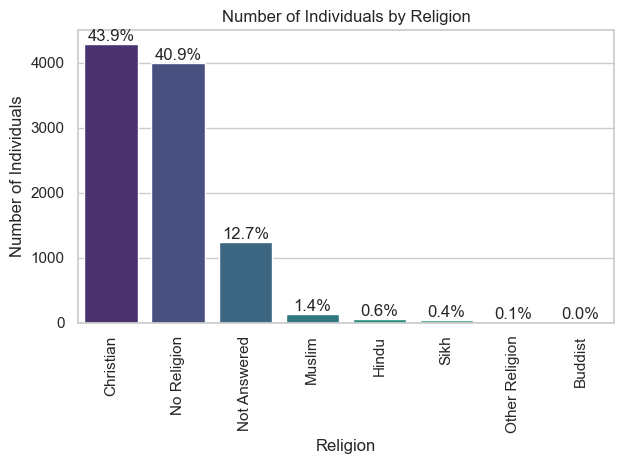

In [121]:
#calculating counts and percentages for each religion
count_religion = my_df2['Religion'].value_counts()
religion_percent = (count_religion/ count_religion.sum()) * 100

sns.barplot(x=count_religion.index, y=count_religion.values, palette='viridis')
plt.xlabel('Religion')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals by Religion')
plt.xticks(rotation=90)

#annotating bars with percentage values for better understanding
for index, value in enumerate(count_religion):
    percentage = religion_percent[index]
    plt.text(index, value, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("Religion Count Bar Chart.png")
plt.show()

##### Recall from our result for data cleaning we had just 1 Catholic entry in the population result and 5127 christians ,and there is only a Catholic Church, this means there will be demand for another religious building for the Christian denomination. We can also condense catholic to christian in line with the 2021 census (https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/religion/bulletins/religionenglandandwales/census2021)

## Married and Divorce Rates

In [124]:
my_df2['Marital Status'].value_counts()

Marital Status
Single         3406
Married        2617
N/A(Minor)     2352
Divorced        961
Widowed         395
N/A (Minor)      38
Name: count, dtype: int64

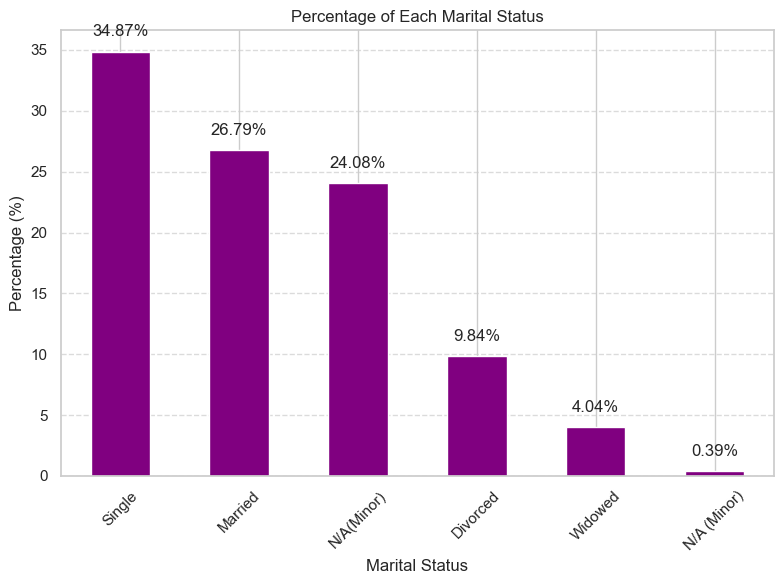

In [125]:
# Calculate value counts and percentages
marital_status_counts = my_df2['Marital Status'].value_counts()
marital_status_percentages = (marital_status_counts / len(my_df2)) * 100

# Bar Plot
plt.figure(figsize=(8, 6))
marital_status_percentages.sort_values(ascending=False).plot(
    kind='bar',
    color='purple',
    title='Percentage of Each Marital Status'
)
#adding percentage on the bars for better representation
for index, value in enumerate(marital_status_percentages.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')
    
    
plt.ylabel('Percentage (%)')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [126]:
#calculating the total population
total_population = len(my_df2)
print(f'Total population is: {total_population}')

#calculating the number of married individuals
married_individuals = len(my_df2[my_df2['Marital Status'] == 'Married'])
print(f'Total number of married individuals is: {married_individuals}')

#calculating the number of divorced individuals
divorced_individuals = len(my_df2[my_df2['Marital Status'] == 'Divorced'])
print(f'Total number of divorced individuals is: {divorced_individuals}')

#calculating marriage percentage of the population
marriage_percentage = (married_individuals / total_population) * 100
print(f'Marriage percentage of the population is: {marriage_percentage:.2f} %')

#calculating divorce percentage of the population
divorce_percentage = (divorced_individuals / total_population) * 100
print(f'Divorce percentage of the population is: {divorce_percentage:.2f} %')

Total population is: 9769
Total number of married individuals is: 2617
Total number of divorced individuals is: 961
Marriage percentage of the population is: 26.79 %
Divorce percentage of the population is: 9.84 %


/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/2342939954.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Status', y='Percentage', data=data, palette='plasma')


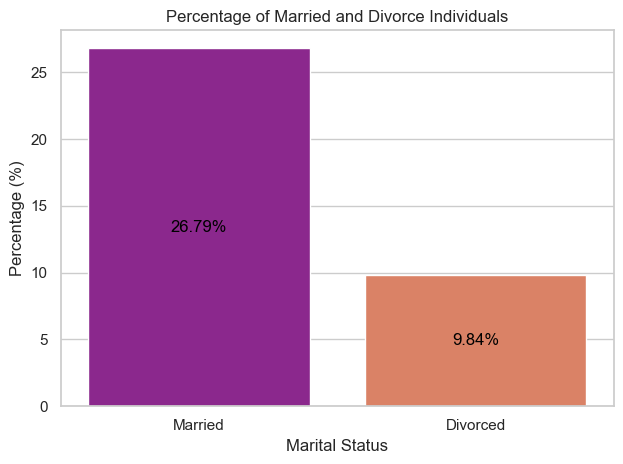

In [127]:
#preparing the data for plotting
status_labels = ['Married', 'Divorced',]
percentages = [marriage_percentage,divorce_percentage]

#creating a DataFrame for plotting
data = pd.DataFrame({
    'Status': status_labels,
    'Percentage': percentages
})

#plotting the bar chart
bar_plot = sns.barplot(x='Status', y='Percentage', data=data, palette='plasma')

#adding percentage annotations inside the bars
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}%', 
                  ha='center', va='center', color='black', fontsize=12)

#customizing the plot
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Married and Divorce Individuals')
plt.xticks(rotation=0)
plt.tight_layout()

#saving and displaying the plot
plt.savefig('Percentage of Married and Divorce Individuals.png')

plt.show()

## High Density Housing

##### since we don't have historical data isn't available

In [130]:
# Calculate the number of unique households by grouping by House Number and Street
households = my_df.groupby(['House Number', 'Street']).size().reset_index(name='Household Count')

# Total population (number of people in the dataset)
population = my_df['Age'].notna().sum()

# Growth factor = population per household
growth_factor = population / len(households)  # Number of households is the length of unique 'House Number' and 'Street'
print("Growth Factor (population per household):", round(growth_factor))

# Set a threshold to decide if the population density indicates growth (e.g., a growth factor greater than 3)
if growth_factor > 3:
    print("Recommendation: High-density housing")


Growth Factor (population per household): 3


## Household Occupancy

In [132]:
# Group by 'House Number' and 'Street' to calculate household sizes
household_sizes = my_df2.groupby(['House Number', 'Street']).size().reset_index(name='Household Count')

# Display the resulting DataFrame
print(household_sizes.head())

# If you want to merge the household size back into the original DataFrame:
my_df2 = my_df2.merge(household_sizes, on=['House Number', 'Street'])

# Display the updated DataFrame
print(my_df2[['House Number', 'Street', 'Household Count']].head())


   House Number          Street  Household Count
0             1      Acorn Fort                2
1             1    Allan Palace                6
2             1  Allen Crossing                1
3             1      April Lane                1
4             1   Autumn Street                2
   House Number     Street  Household Count
0             1  Todd Lake                2
1             1  Todd Lake                2
2             2  Todd Lake                1
3             3  Todd Lake                1
4             4  Todd Lake                4


In [133]:
my_df2

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Categories,Age Group,Household Count
0,1,Todd Lake,Zoe,Vaughan,82,Head,Married,Female,"Retired Journalist, newspaper",Unknown,No Religion,81-100 (Very Old),80-84,2
1,1,Todd Lake,John,Vaughan,80,Husband,Married,Male,Retired Paramedic,Unknown,No Religion,81-100 (Very Old),80-84,2
2,2,Todd Lake,Molly,Butler,66,Head,Widowed,Female,Retail banker,Unknown,No Religion,66-80 (Elderly),65-69,1
3,3,Todd Lake,Eileen,Powell,79,Head,Widowed,Female,Retired Adult guidance worker,Unknown,Christian,66-80 (Elderly),75-79,1
4,4,Todd Lake,Laura,Begum,50,Head,Divorced,Female,Paramedic,Unknown,No Religion,51-65 (Seniors),50-54,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,1,Chelmsford Hall,Stanley,Davies,23,Son,Single,Male,Publishing copy,Unknown,No Religion,20-35 (Young Adults),20-24,8
9765,1,Chelmsford Hall,Lindsey,Davies,21,Daughter,Divorced,Female,University Student,Unknown,Christian,20-35 (Young Adults),20-24,8
9766,1,Chelmsford Hall,Maurice,Davies,19,Son,Single,Male,University Student,Unknown,No Religion,20-35 (Young Adults),15-19,8
9767,1,Chelmsford Hall,Carole,Davies,18,Daughter,Single,Female,Student,Unknown,Christian,13-19 (Teenagers),15-19,8


In [134]:
#calculating average number of people per household
av_occupancy = household_sizes['Household Count'].mean()
rounded_av_occupancy = round(av_occupancy)
print(f"The average number of people per household is: {rounded_av_occupancy}")

The average number of people per household is: 3


## Low-Density Housing/House Usage

The average number of people per household is: 3
Overused houses: 1059 (30.58%)
Underused houses: 1904 (54.98%)
Ideal houses: 500 (14.44%)


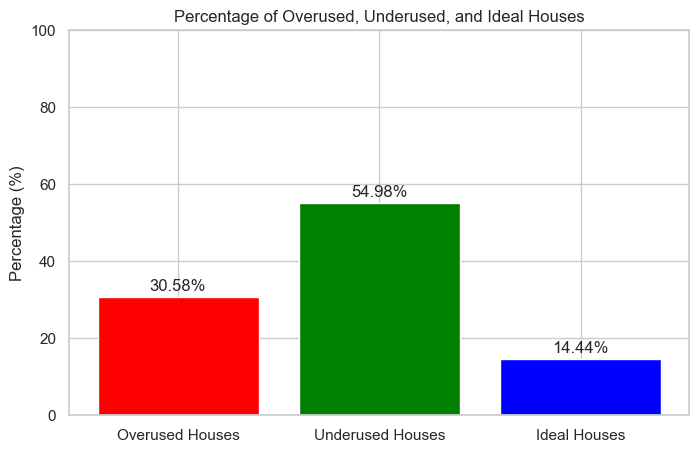

In [136]:
# Determine overused, underused, and optimal houses
household_sizes['Overused'] = household_sizes['Household Count'] > rounded_av_occupancy
household_sizes['Underused'] = household_sizes['Household Count'] < rounded_av_occupancy
household_sizes['Ideal'] = household_sizes['Household Count'] == rounded_av_occupancy

# Calculate the number and percentage of houses in each category
overused_houses = household_sizes['Overused'].sum()
underused_houses = household_sizes['Underused'].sum()
ideal_houses = household_sizes['Ideal'].sum()
total_houses = household_sizes.shape[0]

percentage_overused = (overused_houses / total_houses) * 100
percentage_underused = (underused_houses / total_houses) * 100
percentage_ideal = (ideal_houses / total_houses) * 100

# Print the results
print(f"The average number of people per household is: {rounded_av_occupancy}")
print(f"Overused houses: {overused_houses} ({percentage_overused:.2f}%)")
print(f"Underused houses: {underused_houses} ({percentage_underused:.2f}%)")
print(f"Ideal houses: {ideal_houses} ({percentage_ideal:.2f}%)")

# Visualize the percentages
categories = ['Overused Houses', 'Underused Houses', 'Ideal Houses']
percentages = [percentage_overused, percentage_underused, percentage_ideal]
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, percentages, color=colors)

# Adding percentage annotations on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}%', ha='center', va='bottom')

# Adding titles and labels
plt.title('Percentage of Overused, Underused, and Ideal Houses')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Saving and displaying the plot
plt.savefig('House Usage Plot.png')
plt.show()

##### From the result above we can observe that most houses are underused with a percentage of 54.98% followed by over used houses(30.58%) and then ideal houses which are houses with the average number of people of household(3).

##### This shows that the existing houses are underused, and low-density housing is not really a priority.

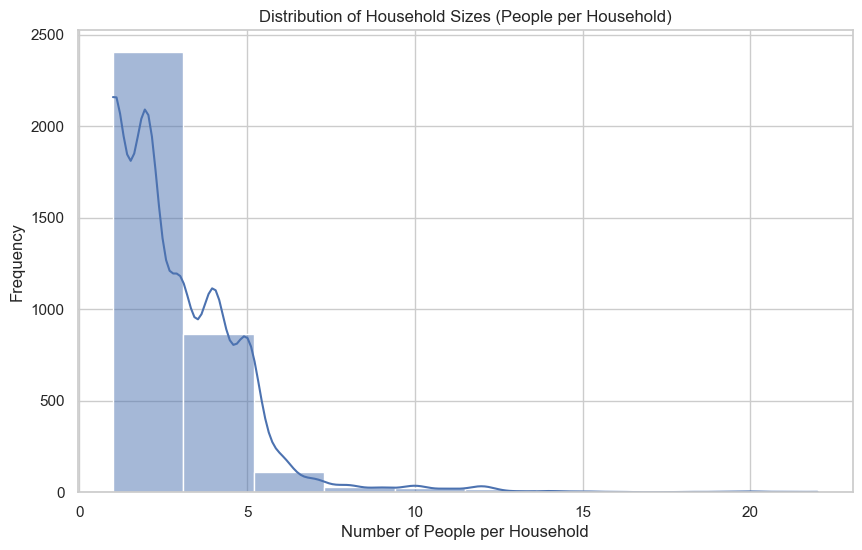

In [138]:
# Calculate the number of people per household
households_size = my_df.groupby(['House Number', 'Street']).size()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(households_size, bins=10, kde=True)
plt.title('Distribution of Household Sizes (People per Household)')
plt.xlabel('Number of People per Household')
plt.ylabel('Frequency')
plt.show()

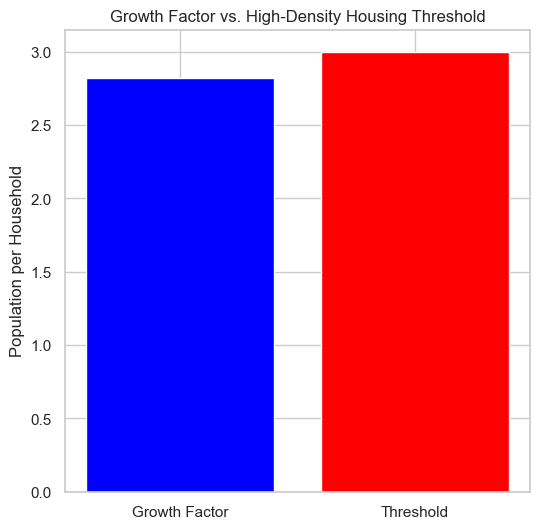

In [139]:
# Set a threshold for high-density housing (e.g., 3 people per household)
threshold = 3

# Create a bar plot comparing the growth factor to the threshold
plt.figure(figsize=(6, 6))
plt.bar(['Growth Factor', 'Threshold'], [growth_factor, threshold], color=['blue', 'red'])
plt.title('Growth Factor vs. High-Density Housing Threshold')
plt.ylabel('Population per Household')
plt.show()

In [140]:
# Calculate number of people per household
household_sizes = my_df2.groupby(['House Number', 'Street']).size()

# Define overcrowding as more than 4 people per household
overcrowded = household_sizes[household_sizes > 4]

# Determine percentage of overcrowded households
overcrowding_rate = len(overcrowded) / len(household_sizes) * 100
print(f"Overcrowding Rate: {overcrowding_rate:.2f}%")

# Set threshold for overcrowding to indicate high-density housing (e.g., >20%)
if overcrowding_rate > 20:
    print("Recommendation: High-density housing is needed.")
else:
    print("Overcrowding is moderate. High-density housing may not be urgent.")


Overcrowding Rate: 16.43%
Overcrowding is moderate. High-density housing may not be urgent.


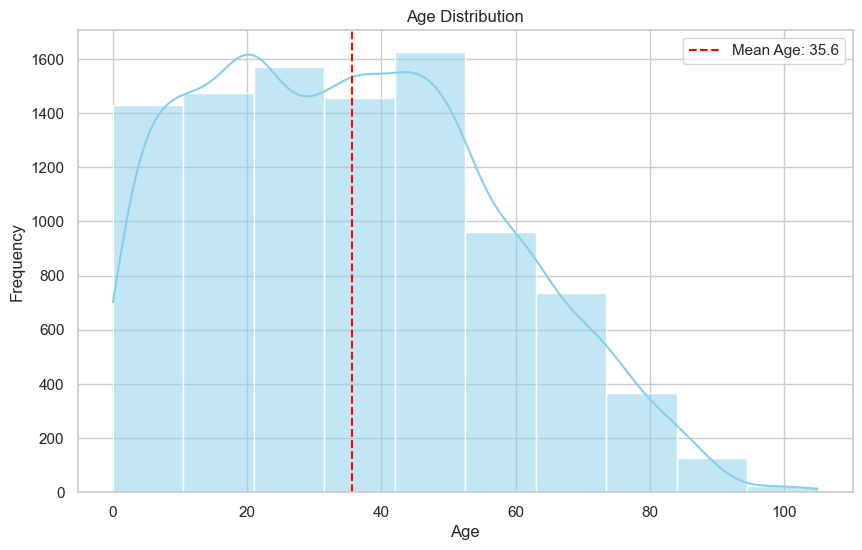

Percentage of Young Population (20-40): 31.38%
Percentage of Elderly Population (60+): 15.47%


In [141]:
# Step 1: Total population (number of rows in the dataset)
total_population = len(my_df2)

# Step 2: Analyze age distribution
age_distribution = my_df2['Age']

# Step 3: Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(age_distribution, bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(age_distribution.mean(), color='red', linestyle='--', label=f"Mean Age: {age_distribution.mean():.1f}")
plt.legend()
plt.show()

# Step 4: Identify specific age groups
# Example: Percentage of younger population (20-40 years)
young_population = my_df2[(my_df2['Age'] >= 20) & (my_df2['Age'] <= 40)]
young_percentage = (len(young_population) / total_population) * 100
print(f"Percentage of Young Population (20-40): {young_percentage:.2f}%")

# Example: Percentage of elderly population (60+ years)
elderly_population = my_df[my_df['Age'] >= 60]
elderly_percentage = (len(elderly_population) / total_population) * 100
print(f"Percentage of Elderly Population (60+): {elderly_percentage:.2f}%")

##### Since we do not have data on the population's income

From my analysis above:

Young Population (20-40): 31.38%
A moderate proportion, not strongly indicative of rapid expansion.

Overcrowding Rate: 16.43%
A relatively low to moderate level of overcrowding, suggesting that existing housing is generally adequate for the current population size.

Conclusion:
Low-density housing is not an immediate priority. Families may prefer affordable, moderately sized homes rather than large, luxurious homes typically associated with low-density housing.There is no pressing need for high-density housing in the town.

## Using the average person per Household approach

In [144]:
# Step 1: Group by household and calculate size
household_sizes = my_df2.groupby(['House Number', 'Street']).size()

# Step 2: Filter households with 4 or more members
large_families = household_sizes[household_sizes >= 4]

# Step 3: Calculate percentage of large families
large_family_percentage = (len(large_families) / len(household_sizes)) * 100
print(f"Percentage of Large Families (4+ members): {large_family_percentage:.2f}%")

# Step 4: Determine if there is demand for large housing (e.g., >30%)
if large_family_percentage > 30:
    print("There is demand for large family housing. Consider low-density housing.")
else:
    print("There is limited demand for large family housing. Low-density housing may not be necessary.")


Percentage of Large Families (4+ members): 30.58%
There is demand for large family housing. Consider low-density housing.


##### While there is demand for larger family housing (low-density homes), the lack of affluence suggests that families may not be able to afford expensive, spacious homes. This finding points to the following:

Low-density housing is not an immediate priority.
Families may prefer affordable, moderately sized homes rather than large, luxurious homes typically associated with low-density housing.

### Commuters and Non-Commuters

In [147]:
# Creating unique list for occupations that requires people to leave town
list(my_df2["Occupation"].unique())

['Retired Journalist, newspaper',
 'Retired Paramedic',
 'Retail banker',
 'Retired Adult guidance worker',
 'Paramedic',
 'Student',
 'Publishing rights manager',
 'Hotel manager',
 'Patent examiner',
 'Retired Chiropractor',
 'Unemployed',
 'Veterinary surgeon',
 'Insurance claims handler',
 'Pharmacist, community',
 'Tourist information centre manager',
 'Health and safety inspector',
 'Insurance underwriter',
 'Chartered legal executive (England and Wales)',
 'Chief Marketing Officer',
 'Psychotherapist, dance movement',
 'Exhibitions officer, museum/gallery',
 "Nurse, children's",
 'Fisheries officer',
 'Optometrist',
 'Estate manager/land agent',
 'Printmaker',
 'Training and development officer',
 "Barrister's clerk",
 'University Student',
 "Politician's assistant",
 'Meteorologist',
 'Environmental consultant',
 'Retired Nature conservation officer',
 'Biomedical scientist',
 'Retired Horticultural therapist',
 'Artist',
 'Retired Engineer, manufacturing systems',
 'Retired Ph

In [148]:
# Defining a function to create a new column to group occupation into groups
def occupation_in_groups(occupation):
    if 'PhD Student' in occupation:
        return 'University Student'
    elif 'Retired' in occupation:
        return 'Retired'
    elif 'Unemployed' in occupation:
        return 'Unemployed'
    elif 'Student' in occupation:
        return 'Student'
    elif 'Child' in occupation:
        return 'Child'
    else:
        return 'Employed'

# Apply the function to the 'Occupation' column
my_df2['Grouped Occupation'] = my_df2['Occupation'].map(occupation_in_groups)

# Display the updated DataFrame with the new column
print(my_df2[['Occupation', 'Grouped Occupation']])

                         Occupation Grouped Occupation
0     Retired Journalist, newspaper            Retired
1                 Retired Paramedic            Retired
2                     Retail banker           Employed
3     Retired Adult guidance worker            Retired
4                         Paramedic           Employed
...                             ...                ...
9764                Publishing copy           Employed
9765             University Student            Student
9766             University Student            Student
9767                        Student            Student
9768                        Student            Student

[9769 rows x 2 columns]


In [149]:
my_df2

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Categories,Age Group,Household Count,Grouped Occupation
0,1,Todd Lake,Zoe,Vaughan,82,Head,Married,Female,"Retired Journalist, newspaper",Unknown,No Religion,81-100 (Very Old),80-84,2,Retired
1,1,Todd Lake,John,Vaughan,80,Husband,Married,Male,Retired Paramedic,Unknown,No Religion,81-100 (Very Old),80-84,2,Retired
2,2,Todd Lake,Molly,Butler,66,Head,Widowed,Female,Retail banker,Unknown,No Religion,66-80 (Elderly),65-69,1,Employed
3,3,Todd Lake,Eileen,Powell,79,Head,Widowed,Female,Retired Adult guidance worker,Unknown,Christian,66-80 (Elderly),75-79,1,Retired
4,4,Todd Lake,Laura,Begum,50,Head,Divorced,Female,Paramedic,Unknown,No Religion,51-65 (Seniors),50-54,4,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,1,Chelmsford Hall,Stanley,Davies,23,Son,Single,Male,Publishing copy,Unknown,No Religion,20-35 (Young Adults),20-24,8,Employed
9765,1,Chelmsford Hall,Lindsey,Davies,21,Daughter,Divorced,Female,University Student,Unknown,Christian,20-35 (Young Adults),20-24,8,Student
9766,1,Chelmsford Hall,Maurice,Davies,19,Son,Single,Male,University Student,Unknown,No Religion,20-35 (Young Adults),15-19,8,Student
9767,1,Chelmsford Hall,Carole,Davies,18,Daughter,Single,Female,Student,Unknown,Christian,13-19 (Teenagers),15-19,8,Student


#### occupation

In [151]:
my_df2['Grouped Occupation'].value_counts()

Grouped Occupation
Employed              5111
Student               2564
Retired                840
Unemployed             620
Child                  614
University Student      20
Name: count, dtype: int64

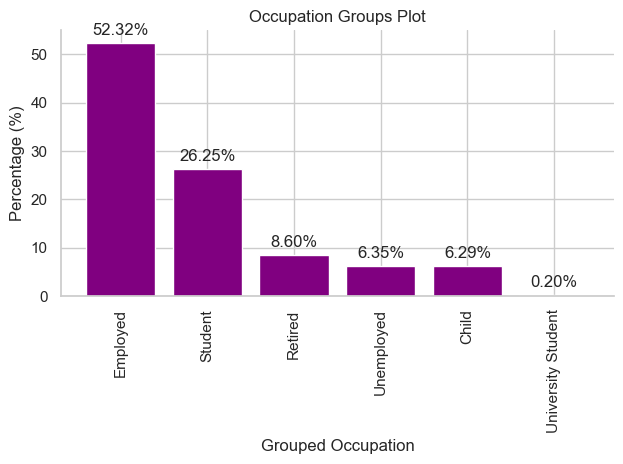

In [152]:
counts = my_df2['Grouped Occupation'].value_counts()

#calculating the percentages of each occupation group
percentages = (counts / counts.sum()) * 100

#plotting the bar chart
plt.bar(percentages.index, percentages.values, color='purple')
plt.ylabel('Percentage (%)')
plt.xlabel('Grouped Occupation')
plt.title('Occupation Groups Plot')

#adding percentage on the bars for better representation
for index, value in enumerate(percentages.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

#adjusting layouts
plt.xticks(rotation=90)
plt.tight_layout()

#removing the top and right spines (box lines) so the visualization looks better
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#saving and showing the plot
plt.savefig("Occupation Groups Plot.png")
plt.show()

##### The above plot we can observe that most individuals are employed with a high employment rate of 52.32% and low unemployemnt rate of 6.35%

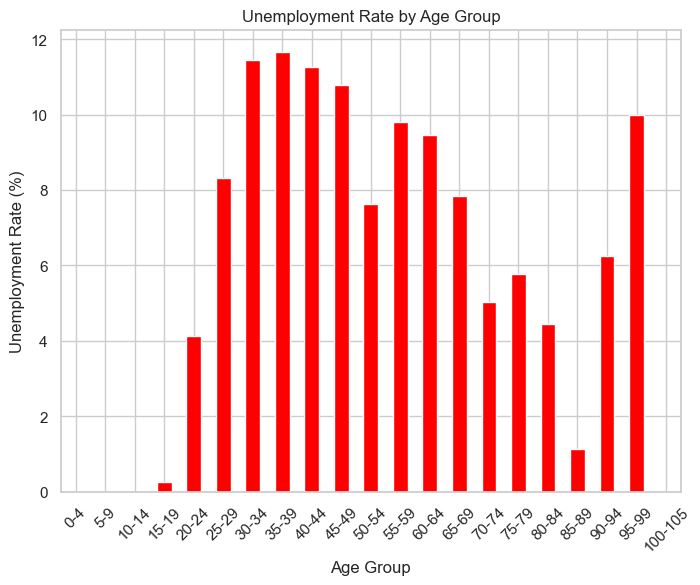

In [154]:
# Filter for employed individuals
unemployed_cat = my_df2[my_df2['Grouped Occupation'] == 'Unemployed']

age_groups =  ['16-14', '25-34', '35-49', '50-64', '65+']
# Group by 'Age Group' to count the number of employed individuals in each age group
unemployment_by_age_group = unemployed_cat['Age Group'].value_counts()

# Total count by age group to calculate unemployment rates
total_by_age_group = my_df2['Age Group'].value_counts()

# Calculate the unemployment rate by age group
unemployment_rate_by_age_group = (unemployment_by_age_group / total_by_age_group) * 100

# Plotting unemployment rate by age group
plt.figure(figsize=(8, 6))
unemployment_rate_by_age_group.plot(kind='bar', color='red')
plt.title('Unemployment Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)

#saving and showing the plot
plt.savefig("Unemployment rate Plot.png")
plt.show()

##### From the plot above we can observe that people in the age group 35-39 have the highest unemployment rate 

In [156]:
#filtering the DataFrame to include only rows where the Occupation_Groups is 'Employed'
employed_df = my_df2[my_df2['Grouped Occupation'] == 'Employed']

#printing out the unique values in the 'Occupation_Group' column of the filtered DataFrame
unique_occupation_groups = employed_df['Occupation'].unique()
print("Unique Occupations of employed individuals:")
print(unique_occupation_groups)

Unique Occupations of employed individuals:
['Retail banker' 'Paramedic' 'Publishing rights manager' 'Hotel manager'
 'Patent examiner' 'Veterinary surgeon' 'Insurance claims handler'
 'Pharmacist, community' 'Tourist information centre manager'
 'Health and safety inspector' 'Insurance underwriter'
 'Chartered legal executive (England and Wales)' 'Chief Marketing Officer'
 'Psychotherapist, dance movement' 'Exhibitions officer, museum/gallery'
 "Nurse, children's" 'Fisheries officer' 'Optometrist'
 'Estate manager/land agent' 'Printmaker'
 'Training and development officer' "Barrister's clerk"
 "Politician's assistant" 'Meteorologist' 'Environmental consultant'
 'Biomedical scientist' 'Artist' 'Geophysicist/field seismologist'
 'Medical sales representative' 'Research scientist (life sciences)'
 'Engineer, chemical' 'Corporate investment banker' 'Field trials officer'
 'Rural practice surveyor' 'Designer, exhibition/display'
 'Engineer, mining' 'Early years teacher' 'Passenger transpo

In [157]:
#counting the total number of employed individuals
total_employed = len(employed_df)
print(f'The total number of employed individuals in the population is: {total_employed}')

The total number of employed individuals in the population is: 5111


In [158]:
university_students = my_df2[my_df2['Grouped Occupation'] == 'University Student']

#counting the number of university students
total_university_students = len(university_students)

#printing the total number of university students
print(f'The total number of university students in the population is: {total_university_students}')

The total number of university students in the population is: 20


In [159]:
#calculating the number of commuters in the population
commuters = total_university_students + total_employed

#calculating the total population
total_population = len(my_df2)
non_commuters = total_population - commuters

#calculating the percentage of commuters in the population
percentage_commuters = (commuters / total_population) * 100
percentage_non_commuters = (non_commuters / total_population) * 100

#printing the results
print(f'The total number of commuters is: {commuters}')
print(f'The percentage of commuters in the population is: {percentage_commuters:.2f}%')
print(f'The total number of commuters is: {non_commuters}')
print(f'The percentage of commuters in the population is: {percentage_non_commuters:.2f}%')

The total number of commuters is: 5131
The percentage of commuters in the population is: 52.52%
The total number of commuters is: 4638
The percentage of commuters in the population is: 47.48%


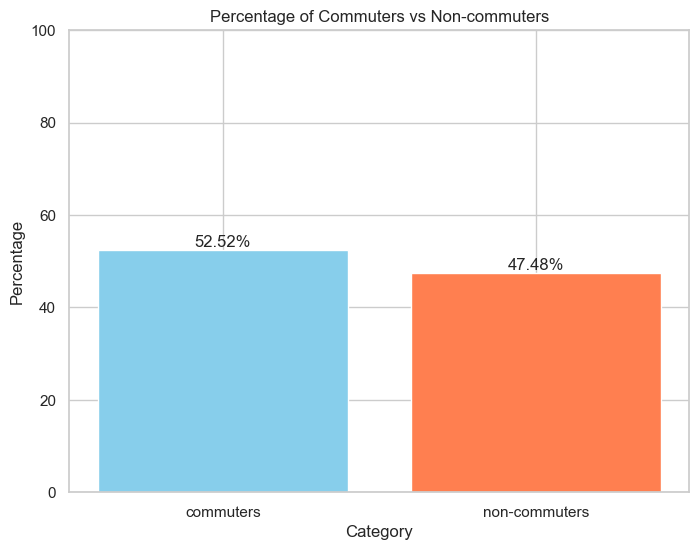

In [160]:
#visualizing the commuters and non-commuters percentage of the population
#getting the data for the plot
categories = ['commuters', 'non-commuters']
percentages = [percentage_commuters, percentage_non_commuters]

#creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color=['skyblue', 'coral'])

#adding percentages in the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0, height,
        f'{height:.2f}%', ha='center', va='bottom', fontsize=12
    )

#adding titles and labels
plt.title('Percentage of Commuters vs Non-commuters')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.ylim(0, 100)  #ensuring y-axis goes up to 100% for clarity

#saving and displaying the plot
plt.savefig('Percentage of Commuters vs Non-commuters.png')
plt.show()

#### With 52.52% as the percentage of commuters which includes students who need to commute to universities and employed indivuduals commuting to work, it will be essential to build a train station so as reduce congestions on the road

## Birth rate and Death rate

- Birth rate

In [164]:
#extracting the number of live births (i.e new borns) for the year
total_population = len(my_df2)
new_borns = len(my_df2[my_df2['Age'] == 0])
print(f'The total number of new borns in the population is: {new_borns}')

#calculating the birth rate of new borns by 1000 population
#1000 is the standard unit for measuring birth rates
birth_rate = (new_borns  / total_population) * 1000

#printing the birth rate
print(f'The birth rate of the population is: {birth_rate:.2f}%')

The total number of new borns in the population is: 101
The birth rate of the population is: 10.34%


#### https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/conceptionandfertilityrates/bulletins/conceptionstatistics/2021
According to office of National Statistics in the last decade in UK women are of child bearing orfertile betwen 18 and 45

In [166]:
#filtering the DataFrame to get the fertile female population typically between age 18-50
fertile_females = my_df2[(my_df2['Gender'] == 'Female') & (my_df2['Age'] >= 18) & (my_df2['Age'] <= 45)]

#counting the number of individuals in the fertile female population
count_fertile_females = len(fertile_females)
print(f"The number of fertile females in the population is: {count_fertile_females}")

#calculating the fertility rate
#fertility rate is the number of new borns per 1000 fertile females
fertility_rate = (new_borns/ count_fertile_females) * 1000
print(f"The fertility rate per 1000 fertile females in the population is: {fertility_rate:.2f} %")

The number of fertile females in the population is: 2302
The fertility rate per 1000 fertile females in the population is: 43.87 %


- Death rate

In [168]:
# Grouping the dataset by 'Age Group' and counting the number of entries in each group
age_group_counts = my_df2.groupby(['Age Group']).size()

# Converting the resulting Series into a DataFrame and resetting the index
age_group_data = age_group_counts.to_frame(name='Count').reset_index()

# Displaying the resulting DataFrame
print(age_group_data)

   Age Group  Count
0        0-4    507
1        5-9    666
2      10-14    710
3      15-19    743
4      20-24    801
5      25-29    674
6      30-34    690
7      35-39    754
8      40-44    736
9      45-49    741
10     50-54    656
11     55-59    479
12     60-64    444
13     65-69    319
14     70-74    278
15     75-79    208
16     80-84    135
17     85-89     89
18     90-94     16
19     95-99     10
20   100-105     12


/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/299022454.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = my_df2.groupby(['Age Group']).size()


In [169]:
#calculating the difference in counts between consecutive age groups
#iterating over the rows of the DataFrame
for idx, row in age_group_data.iterrows():
    # Skip the first row since there is no previous row to compare
    if idx == 0:
        continue
    else:
        #calculating the difference between the current and previous row's count
        age_group_data.at[idx, 'Row_Difference'] = age_group_data.iloc[int(idx)-1][1] - row['Count']

age_group_data

/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/2868215001.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_group_data.at[idx, 'Row_Difference'] = age_group_data.iloc[int(idx)-1][1] - row['Count']
/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/2868215001.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_group_data.at[idx, 'Row_Difference'] = age_group_data.iloc[int(idx)-1][1] - row['Count']


,Age Group,Count,Row_Difference
0,0-4,507,NaN
1,5-9,666,-159.0
2,10-14,710,-44.0
3,15-19,743,-33.0
4,20-24,801,-58.0
5,25-29,674,127.0
6,30-34,690,-16.0
7,35-39,754,-64.0
8,40-44,736,18.0
9,45-49,741,-5.0


In [170]:
#displaying the DataFrame structure
#to understand the structure of the dataframe
print(age_group_data.head()) 

#calculating the total number of deaths in the population for age groups 55 to 120+
#assuming the DataFrame has exactly 2 columns 
total_death = 0
for idx in range(11, 22):  #indices 11 to 22 correspond to age groups 55 to 120+
    if idx < len(age_group_data):  #checking if idx is within the valid range
        #assuming the second column index is 1
        total_death += age_group_data.iloc[idx, 1] 

#getting the average of the total deaths over 5 age groups
total_death = total_death / 5
print(f'The total number of deaths for age groups 55 and above is: {round(total_death)}')

#calculating the total number of deaths across various age groups per year
age_group_count = len(range(11, 22))
total_death_per_year = total_death / age_group_count
print(f'The total number of deaths per year for age groups 55 and above is: {round(total_death_per_year)}')

#calculating the death rate
death_rate = (total_death_per_year / total_population) * 1000
print(f'The death rate of the population is: {death_rate:.2f}')

  Age Group  Count  Row_Difference
0       0-4    507             NaN
1       5-9    666          -159.0
2     10-14    710           -44.0
3     15-19    743           -33.0
4     20-24    801           -58.0
The total number of deaths for age groups 55 and above is: 398
The total number of deaths per year for age groups 55 and above is: 36
The death rate of the population is: 3.70


In [171]:
# Count individuals in each age group
age_group_counts = my_df2['Age Group'].value_counts().sort_index()

# Calculate differences between successive age groups
age_group_differences = age_group_counts.diff().fillna(0)

# Assume negative differences indicate deaths
deaths_in_groups = -age_group_differences.clip(upper=0)

# Calculate total deaths and death rate
total_deaths = deaths_in_groups.sum()
total_population = my_df2.shape[0]
death_rate = (total_deaths / total_population) * 100

# Print Results
print("Age Group Counts:")
print(age_group_counts)
print("\nDeaths Inferred Between Age Groups:")
print(deaths_in_groups)
print(f"\nTotal Deaths: {total_deaths}")
print(f"Death Rate (%): {death_rate:.2f}%")

Age Group Counts:
Age Group
0-4        507
5-9        666
10-14      710
15-19      743
20-24      801
25-29      674
30-34      690
35-39      754
40-44      736
45-49      741
50-54      656
55-59      479
60-64      444
65-69      319
70-74      278
75-79      208
80-84      135
85-89       89
90-94       16
95-99       10
100-105     12
Name: count, dtype: int64

Deaths Inferred Between Age Groups:
Age Group
0-4         -0.0
5-9         -0.0
10-14       -0.0
15-19       -0.0
20-24       -0.0
25-29      127.0
30-34       -0.0
35-39       -0.0
40-44       18.0
45-49       -0.0
50-54       85.0
55-59      177.0
60-64       35.0
65-69      125.0
70-74       41.0
75-79       70.0
80-84       73.0
85-89       46.0
90-94       73.0
95-99        6.0
100-105     -0.0
Name: count, dtype: float64

Total Deaths: 876.0
Death Rate (%): 8.97%


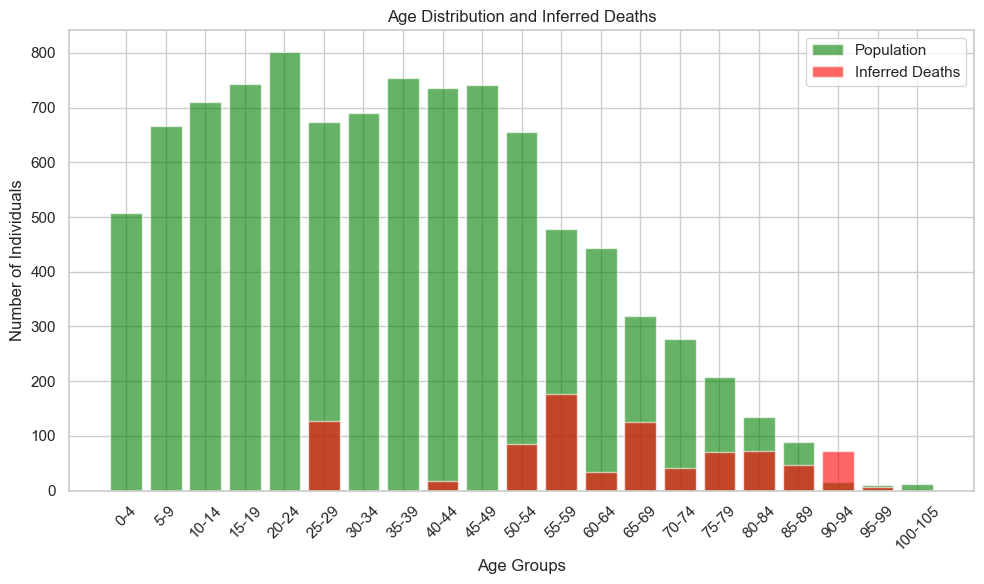

In [172]:
# Visualize the distribution and inferred deaths
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts, color='green', alpha=0.6, label='Population')
plt.bar(age_group_counts.index, deaths_in_groups, color='red', alpha=0.6, label='Inferred Deaths')
plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals')
plt.title('Age Distribution and Inferred Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

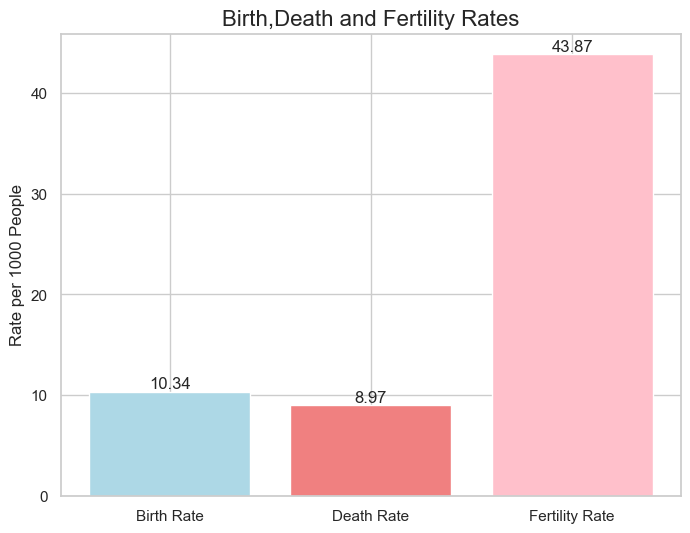

In [173]:
#visualizing the growth rate of the population
#preparing the data for plotting
rates = [birth_rate, death_rate, fertility_rate]
labels = ['Birth Rate', 'Death Rate', 'Fertility Rate']

#plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, rates, color=['lightblue', 'lightcoral', 'pink'])

#adding the percentages inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

#setting the title and labels
plt.title('Birth,Death and Fertility Rates', fontsize=16)
plt.ylabel('Rate per 1000 People')
plt.ylim(0, max(rates) + 2)  #extending y-axis for better visibility

#saving and displaying the plot
plt.savefig('Birth, Death and Fertility Rates.png')
plt.show()

#### From the plot above birth rate(10.34) exceeds death rate (8.97) in the population, there is also a Total Fertility Rate(TFR) of 43.87 per 1000 women

In [175]:
# Count individuals in each age group
age_group_counts = my_df2['Age Group'].value_counts().sort_index()

# Calculate differences between successive age groups
age_group_differences = age_group_counts.diff().fillna(0)

# Assume negative differences indicate deaths over a 5-year period
deaths_in_groups = -age_group_differences.clip(upper=0)

# Calculate total deaths over 5 years
total_deaths_5_years = deaths_in_groups.sum()

# Calculate the annual deaths by dividing by 5
annual_deaths = total_deaths_5_years / 5

# Calculate the death rate per 1,000 population annually
total_population = my_df2.shape[0]
death_rate_per_1000 = (annual_deaths / total_population) * 1000

# Print Results
print("Age Group Counts:")
print(age_group_counts)
print("\nDeaths Inferred Between Age Groups (5-Year):")
print(deaths_in_groups)
print(f"\nTotal Deaths Over 5 Years: {total_deaths_5_years}")
print(f"Annual Deaths: {annual_deaths:.2f}")
print(f"Annual Death Rate (per 1,000 Population): {death_rate_per_1000:.2f}")


Age Group Counts:
Age Group
0-4        507
5-9        666
10-14      710
15-19      743
20-24      801
25-29      674
30-34      690
35-39      754
40-44      736
45-49      741
50-54      656
55-59      479
60-64      444
65-69      319
70-74      278
75-79      208
80-84      135
85-89       89
90-94       16
95-99       10
100-105     12
Name: count, dtype: int64

Deaths Inferred Between Age Groups (5-Year):
Age Group
0-4         -0.0
5-9         -0.0
10-14       -0.0
15-19       -0.0
20-24       -0.0
25-29      127.0
30-34       -0.0
35-39       -0.0
40-44       18.0
45-49       -0.0
50-54       85.0
55-59      177.0
60-64       35.0
65-69      125.0
70-74       41.0
75-79       70.0
80-84       73.0
85-89       46.0
90-94       73.0
95-99        6.0
100-105     -0.0
Name: count, dtype: float64

Total Deaths Over 5 Years: 876.0
Annual Deaths: 175.20
Annual Death Rate (per 1,000 Population): 17.93


In [176]:
# Filter for age groups 55 and above
age_group_counts_55_plus = my_df2[my_df2['Age'] >= 55]['Age Group'].value_counts().sort_index()

# Calculate differences between successive age groups (55+)
age_group_differences_55_plus = age_group_counts_55_plus.diff().fillna(0)

# Assume negative differences indicate deaths over a 5-year period
deaths_in_groups_55_plus = -age_group_differences_55_plus.clip(upper=0)

# Calculate total deaths over 5 years for 55+
total_deaths_5_years_55_plus = deaths_in_groups_55_plus.sum()

# Calculate the annual deaths for 55+
annual_deaths_55_plus = total_deaths_5_years_55_plus / 5

# Calculate the death rate per 1,000 population for 55+ annually
total_population_55_plus = my_df2[my_df2['Age'] >= 55].shape[0]
death_rate_per_1000_55_plus = (annual_deaths_55_plus / total_population_55_plus) * 1000

# Print Results
print("Age Group Counts (55+):")
print(age_group_counts_55_plus)
print("\nDeaths Inferred Between Age Groups (5-Year, 55+):")
print(deaths_in_groups_55_plus)
print(f"\nTotal Deaths Over 5 Years (55+): {total_deaths_5_years_55_plus}")
print(f"Annual Deaths (55+): {annual_deaths_55_plus:.2f}")
print(f"Annual Death Rate (per 1,000 Population, 55+): {death_rate_per_1000_55_plus:.2f}")


Age Group Counts (55+):
Age Group
0-4          0
5-9          0
10-14        0
15-19        0
20-24        0
25-29        0
30-34        0
35-39        0
40-44        0
45-49        0
50-54        0
55-59      479
60-64      444
65-69      319
70-74      278
75-79      208
80-84      135
85-89       89
90-94       16
95-99       10
100-105     12
Name: count, dtype: int64

Deaths Inferred Between Age Groups (5-Year, 55+):
Age Group
0-4         -0.0
5-9         -0.0
10-14       -0.0
15-19       -0.0
20-24       -0.0
25-29       -0.0
30-34       -0.0
35-39       -0.0
40-44       -0.0
45-49       -0.0
50-54       -0.0
55-59       -0.0
60-64       35.0
65-69      125.0
70-74       41.0
75-79       70.0
80-84       73.0
85-89       46.0
90-94       73.0
95-99        6.0
100-105     -0.0
Name: count, dtype: float64

Total Deaths Over 5 Years (55+): 469.0
Annual Deaths (55+): 93.80
Annual Death Rate (per 1,000 Population, 55+): 47.14


In [177]:
growth_rate = birth_rate - death_rate
growth_rate

1.3716859453372905

## Retirement Rate

In [179]:
# Filtering the age groups close to retirement (e.g., 55-65, 65+)
retirement_age_group = my_df2[(my_df2['Age'] >= 55)]

# Count the number of people in each group
retirement_age_counts = retirement_age_group['Age Group'].value_counts()
print(retirement_age_counts)

Age Group
55-59      479
60-64      444
65-69      319
70-74      278
75-79      208
80-84      135
85-89       89
90-94       16
100-105     12
95-99       10
0-4          0
5-9          0
45-49        0
40-44        0
35-39        0
30-34        0
25-29        0
20-24        0
15-19        0
10-14        0
50-54        0
Name: count, dtype: int64


In [180]:
# Filtering the age groups for 55 and above
retirement_age_group = my_df2[my_df2['Age'] >= 55]

# Group by age range (e.g., 55-60, 60-65, 65+)
age_groups = pd.cut(retirement_age_group['Age'], bins=[55, 60, 65, 100], labels=["55-60", "60-65", "65+"])
retirement_age_group['Age Group'] = age_groups

# Count the number of people in each group
retirement_age_counts = retirement_age_group['Age Group'].value_counts()
print(retirement_age_counts)


Age Group
65+      998
55-60    470
60-65    422
Name: count, dtype: int64


/var/folders/1p/p4_3f7rx0b3745pny_1zkshh0000gn/T/ipykernel_71712/1907401690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retirement_age_group['Age Group'] = age_groups


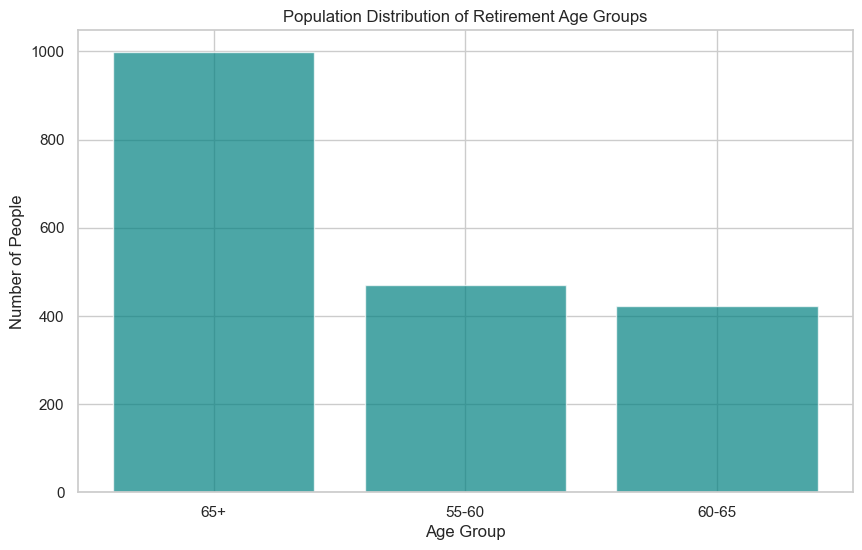

In [181]:
plt.figure(figsize=(10,6))

# Plot for the number of people nearing retirement
plt.bar(retirement_age_counts.index, retirement_age_counts.values, color='teal', alpha=0.7)
plt.title('Population Distribution of Retirement Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.show()

In [182]:
# Calculate the percentage of people who are nearing retirement now (e.g., ages 55-65) vs. younger populations
retirement_percentage = retirement_age_counts.sum() / my_df2.shape[0] * 100
print(f"Percentage of people nearing retirement: {retirement_percentage:.2f}%")

Percentage of people nearing retirement: 19.35%


## Infirmity Distribution in Population

In [184]:
# Filter people who are 65+ and have an infirmity (assuming 'Infirmity' column is available)
elderly_infirm = my_df2[(my_df2['Age'] >= 65) & (my_df2['Infirmity'] == 'Yes')]

# Calculate percentage of elderly with infirmity
elderly_infirm_percentage = elderly_infirm.shape[0] / retirement_age_group.shape[0] * 100
print(f"Percentage of elderly with infirmity: {elderly_infirm_percentage:.2f}%")

Percentage of elderly with infirmity: 0.00%


In [185]:
#counting each unique value in the 'Infirmity' column
infirmity_count = my_df2['Infirmity'].value_counts()
print("Infirmity Unique value count:")
print(infirmity_count)

#calculating the percentage of each unique value
infirmity_percentages = (infirmity_count / len(my_df2)) * 100
print("\nPercentages of each unique value in the 'Infirmity' column:")
print(infirmity_percentages)

Infirmity Unique value count:
Infirmity
Unknown                9663
No Infirmity             40
Physical Disability      19
Blind                    15
Mental Disability        14
Deaf                     11
Disabled                  7
Name: count, dtype: int64

Percentages of each unique value in the 'Infirmity' column:
Infirmity
Unknown                98.914935
No Infirmity            0.409458
Physical Disability     0.194493
Blind                   0.153547
Mental Disability       0.143310
Deaf                    0.112601
Disabled                0.071655
Name: count, dtype: float64


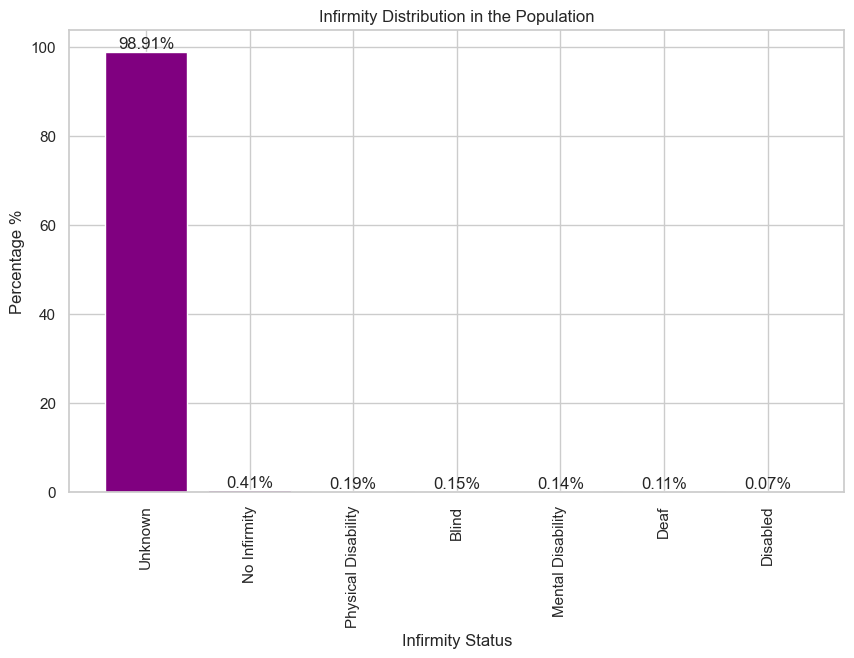

In [186]:
#visualizing the distribution of infirmity statuses with percentages on bars
plt.figure(figsize=(10, 6))
bars = plt.bar(infirmity_percentages.index, infirmity_percentages.values, color='purple')
plt.title('Infirmity Distribution in the Population')
plt.xlabel('Infirmity Status')
plt.ylabel('Percentage %')
plt.xticks(rotation=90)  

#adding percentages on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

#saving and displaying the plot
plt.savefig('Infirmity Distribution in the Population.png', bbox_inches='tight')
plt.show()